### Logistic Regression on Titanic dataset
Logistic regression is a solid choice for binary classification problems like predicting survival.

In [38]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt  #is used to plot visualization graphs
import seaborn as sns  #used for data visualization and data anlysis

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix


In [39]:
file_path = '/content/clean-Titanic.csv'
df = pd.read_csv(file_path)
df_Tour = df.copy()
print(f'there are {df_Tour.shape[0]} rows , and {df_Tour.shape[1]} columns')

there are 1310 rows , and 8 columns


In [40]:
df_Tour.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1.0,1.0,0,29.0000,0.0,0.0,211.3375,2
1,1.0,1.0,1,0.9167,1.0,2.0,151.5500,2
2,1.0,0.0,0,2.0000,1.0,2.0,151.5500,2
3,1.0,0.0,1,30.0000,1.0,2.0,151.5500,2
4,1.0,0.0,0,25.0000,1.0,2.0,151.5500,2


In [41]:
df_Tour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1310 non-null   float64
 1   survived  1310 non-null   float64
 2   sex       1310 non-null   int64  
 3   age       1310 non-null   float64
 4   sibsp     1310 non-null   float64
 5   parch     1310 non-null   float64
 6   fare      1310 non-null   float64
 7   embarked  1310 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 82.0 KB


In [42]:
# Split dataset
X = df_Tour.drop('survived', axis=1)
y = df_Tour['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the splits
print("X_train:\n", X_train)
print("X_test:\n", X_test)
print("Y_train:\n", y_train)
print("Y_test:\n", y_test)

X_train:
       pclass  sex   age  sibsp  parch      fare  embarked
199      1.0    0  24.0    0.0    0.0   49.5042         0
303      1.0    1  64.0    1.0    0.0   75.2500         0
481      2.0    0  22.0    1.0    2.0   41.5792         0
331      2.0    1  18.0    0.0    0.0   11.5000         2
10       1.0    1  47.0    1.0    0.0  227.5250         0
...      ...  ...   ...    ...    ...       ...       ...
1095     3.0    0  28.0    0.0    0.0    7.6292         1
1130     3.0    0  18.0    0.0    0.0    7.7750         2
1294     3.0    1  28.5    0.0    0.0   16.1000         2
860      3.0    0  26.0    0.0    0.0    7.9250         2
1126     3.0    0  28.0    0.0    0.0    7.8958         2

[1048 rows x 7 columns]
X_test:
      pclass  sex   age  sibsp  parch     fare  embarked
701     3.0    1  17.0    0.0    0.0   8.6625         2
994     3.0    1  28.0    0.0    0.0   7.2292         0
350     2.0    0  15.0    0.0    2.0  39.0000         2
986     3.0    1  22.0    0.0    0.0

In [43]:
# Initialize the model
logistic_model = LogisticRegression(max_iter=1000)  # Increase max_iter if convergence issues arise

# Fit the model
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred = logistic_model.predict(X_test)



In [44]:
# Evaluate the model
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print('\n')


print("Actual values:", y_test)
print('\n')
print("Predicted values:", y_pred)
print('\n')

Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.89      0.83       150
         1.0       0.81      0.65      0.72       112

    accuracy                           0.79       262
   macro avg       0.79      0.77      0.77       262
weighted avg       0.79      0.79      0.78       262

Confusion Matrix:
[[133  17]
 [ 39  73]]


Actual values: 701    0.0
994    0.0
350    1.0
986    0.0
409    0.0
      ... 
209    1.0
306    0.0
140    1.0
919    0.0
982    0.0
Name: survived, Length: 262, dtype: float64


Predicted values: [0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1.
 1. 0. 0. 0. 1. 0. 0. 1. 0.

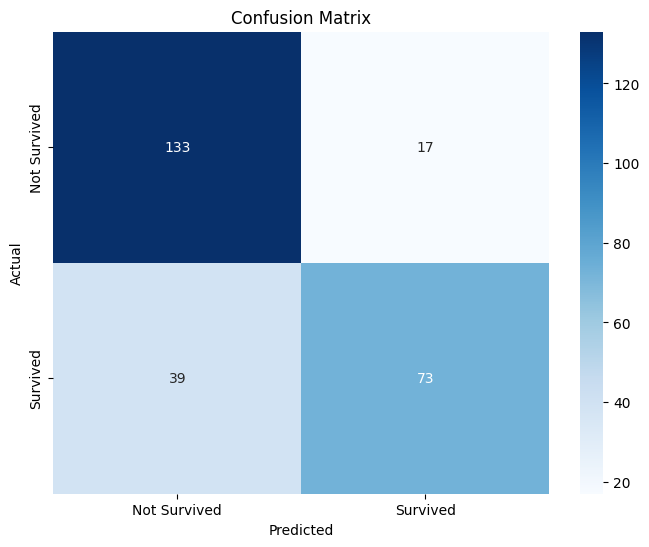

In [45]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot it as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


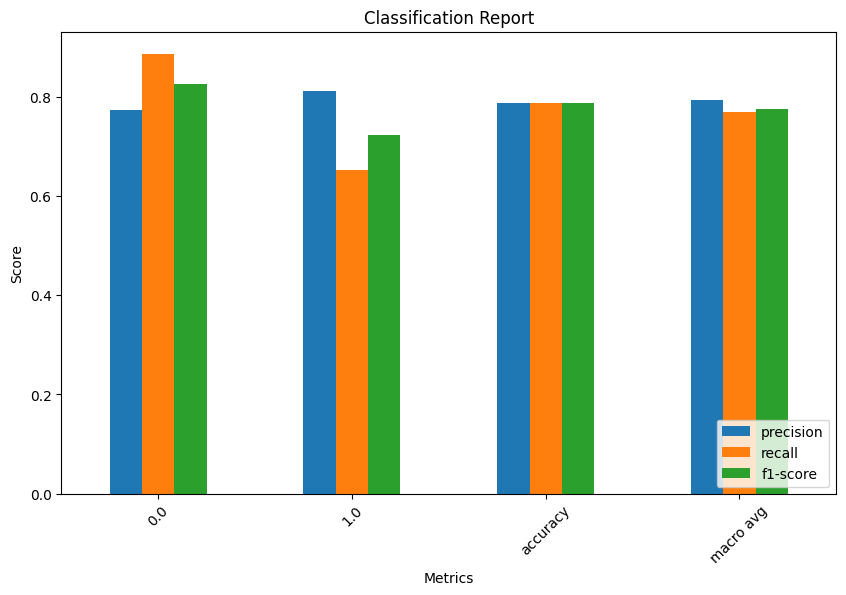

In [46]:
# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Plot the report
report_df.iloc[:-1, :-1].plot(kind='bar', figsize=(10, 6))
plt.title('Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.legend(loc='lower right')
plt.xticks(rotation=45)
plt.show()